## DATA SETUP

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# load local version of gallifrey, before pip installed version, for debugging
import pathlib
import sys
import os

sys.path.append(str(pathlib.Path(os.getcwd()).parent.joinpath("src")))

In [3]:
import yt
import numpy as np
import matplotlib.pyplot as plt

from gallifrey.setup import data_setup
from gallifrey.utilities.math import calculate_pca
from gallifrey.particles import rotated_dataset

TODO: planets.py


In [4]:
snapshot = 127
resolution = 4096
sim_id = "09_18"
ngpps_id: str = "ng75"
planet_categories = [
    "Earth",
    "Super-Earth",
    "Neptunian",
    "Sub-Giant",
    "Giant",
    "D-Burner",
]
save = False

In [5]:
ds, mw, stellar_model, imf, planet_model = data_setup(
    snapshot=snapshot, resolution=resolution, sim_id=sim_id, ngpps_id=ngpps_id
)


      DETECTED LOCAL MACHINE: Test snapshot loaded.

yt : [INFO     ] 2023-07-04 16:57:09,904 Calculating time from 1.000e+00 to be 4.318e+17 seconds
yt : [INFO     ] 2023-07-04 16:57:09,962 Parameters: current_time              = 4.318436660023809e+17 s
yt : [INFO     ] 2023-07-04 16:57:09,963 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-07-04 16:57:09,964 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-07-04 16:57:09,965 Parameters: domain_right_edge         = [100. 100. 100.]
yt : [INFO     ] 2023-07-04 16:57:09,965 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-07-04 16:57:09,965 Parameters: current_redshift          = 4.440892098500626e-16
yt : [INFO     ] 2023-07-04 16:57:09,966 Parameters: omega_lambda              = 0.682
yt : [INFO     ] 2023-07-04 16:57:09,966 Parameters: omega_matter              = 0.318
yt : [INFO     ] 2023-07-04 16:57:09,966 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 202

## PLOT SETUP

In [17]:
from planet_maps import plot_maps
from planet_1dprofiles import plot_1dprofiles
from planet_2dprofiles import plot_2dprofiles

## CREATE DATA SOURCE

In [8]:
radius = 60
normal_vector = calculate_pca(
    mw.sphere(radius=(10, "kpc"))["stars", "Coordinates"]
).components_[-1]

In [9]:
sphere_data = mw.sphere(radius=ds.quan(radius, "kpc"))

rotated_disk_data = rotated_dataset(
    mw.disk(
        radius=ds.quan(radius, "kpc"), height=ds.quan(0.5, "kpc"), normal=normal_vector
    ),
    mw.centre(),
    normal_vector,
    [
        ("stars", "[Fe/H]"),
        ("stars", "number"),
        *[("stars", f"{category}") for category in planet_categories],
        *[("stars", f"star_weighted_{category}") for category in planet_categories],
    ],
)

rotated_sphere_data = rotated_dataset(
    sphere_data,
    mw.centre(),
    normal_vector,
    [
        ("stars", "[Fe/H]"),
        ("stars", "number"),
        *[("stars", f"{category}") for category in planet_categories],
        *[("stars", f"star_weighted_{category}") for category in planet_categories],
    ],
)

yt : [INFO     ] 2023-07-04 16:57:24,064 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-07-04 16:57:24,065 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-07-04 16:57:24,066 Parameters: domain_left_edge          = [-53.69806519 -53.69806519 -53.69806519]
yt : [INFO     ] 2023-07-04 16:57:24,067 Parameters: domain_right_edge         = [51.66095168 51.66095168 51.66095168]
yt : [INFO     ] 2023-07-04 16:57:24,067 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-07-04 16:57:24,068 Allocating for 1.304e+05 particles
yt : [INFO     ] 2023-07-04 16:57:33,752 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-07-04 16:57:33,753 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-07-04 16:57:33,754 Parameters: domain_left_edge          = [-58.64838778 -58.64838778 -58.64838778]
yt : [INFO     ] 2023-07-04 16:57:33,755 Parameters: domain_right_edge         = [58.67914424 58.67914424 58.67914424]
yt : [INFO 

## FACE-ON MAPS

In [ ]:
zplot, zfig = plot_maps(planet_categories, rotated_sphere_data, normal="z", save=save)
zplot_per_star, zfig_per_star = plot_maps(planet_categories, rotated_sphere_data, normal="z", weight_field=("stars", "number"), global_normalisation=False, save=save)

yt : [INFO     ] 2023-07-04 17:16:39,491 xlim = -20.984622 21.015378
yt : [INFO     ] 2023-07-04 17:16:39,491 ylim = -20.984622 21.015378
yt : [INFO     ] 2023-07-04 17:16:39,493 xlim = -20.984622 21.015378
yt : [INFO     ] 2023-07-04 17:16:39,494 ylim = -20.984622 21.015378
yt : [INFO     ] 2023-07-04 17:16:39,495 Splatting (('stars', 'Earth')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-07-04 17:16:39,723 Splatting (('stars', 'D-Burner')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-07-04 17:16:39,912 Splatting (('stars', 'Sub-Giant')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-07-04 17:16:40,114 Splatting (('stars', 'Super-Earth')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-07-04 17:16:40,308 Splatting (('stars', 'Giant')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-07-04 17:16:40,477 Splatting (('stars', 'Neptunian')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-0

## SIDE-ON MAPS

yt : [INFO     ] 2023-07-04 17:15:55,951 xlim = -20.984622 21.015378
yt : [INFO     ] 2023-07-04 17:15:55,951 ylim = -20.984622 21.015378
yt : [INFO     ] 2023-07-04 17:15:55,953 xlim = -20.984622 21.015378
yt : [INFO     ] 2023-07-04 17:15:55,954 ylim = -20.984622 21.015378
yt : [INFO     ] 2023-07-04 17:15:55,956 Splatting (('stars', 'Earth')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-07-04 17:15:56,173 Splatting (('stars', 'D-Burner')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-07-04 17:15:56,357 Splatting (('stars', 'Sub-Giant')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-07-04 17:15:56,543 Splatting (('stars', 'Super-Earth')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-07-04 17:15:56,720 Splatting (('stars', 'Giant')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-07-04 17:15:56,887 Splatting (('stars', 'Neptunian')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-0

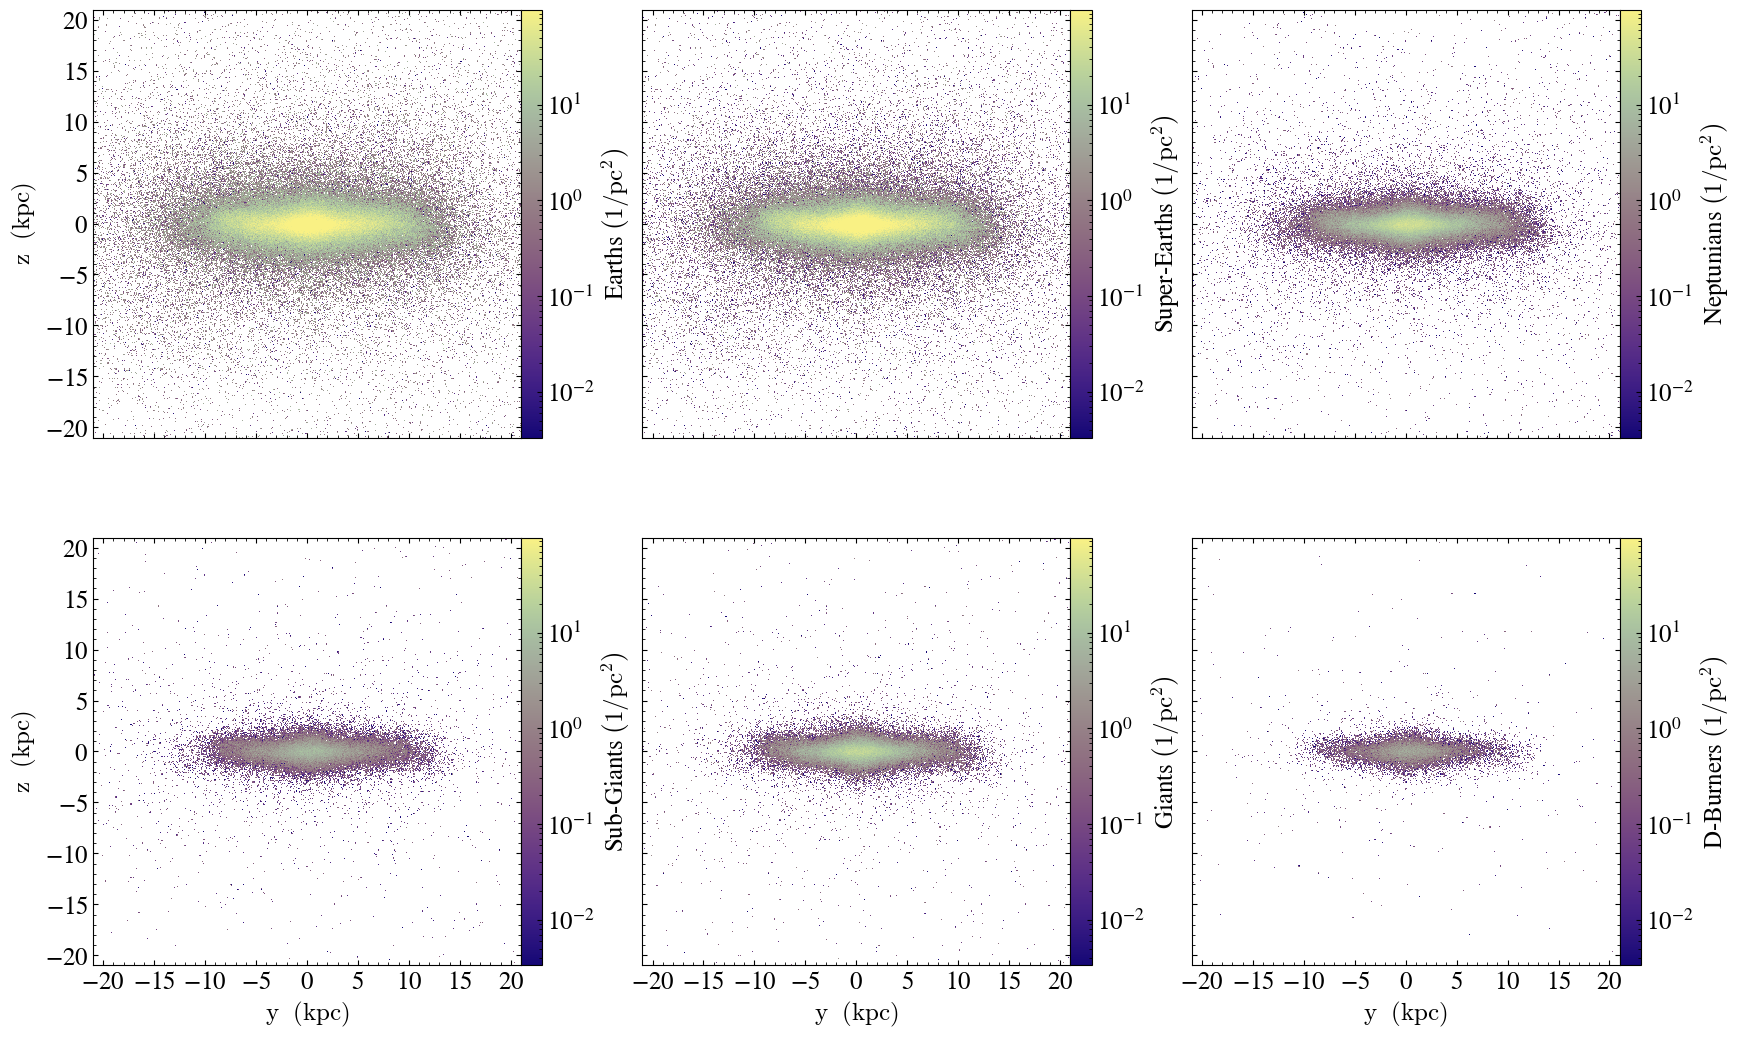

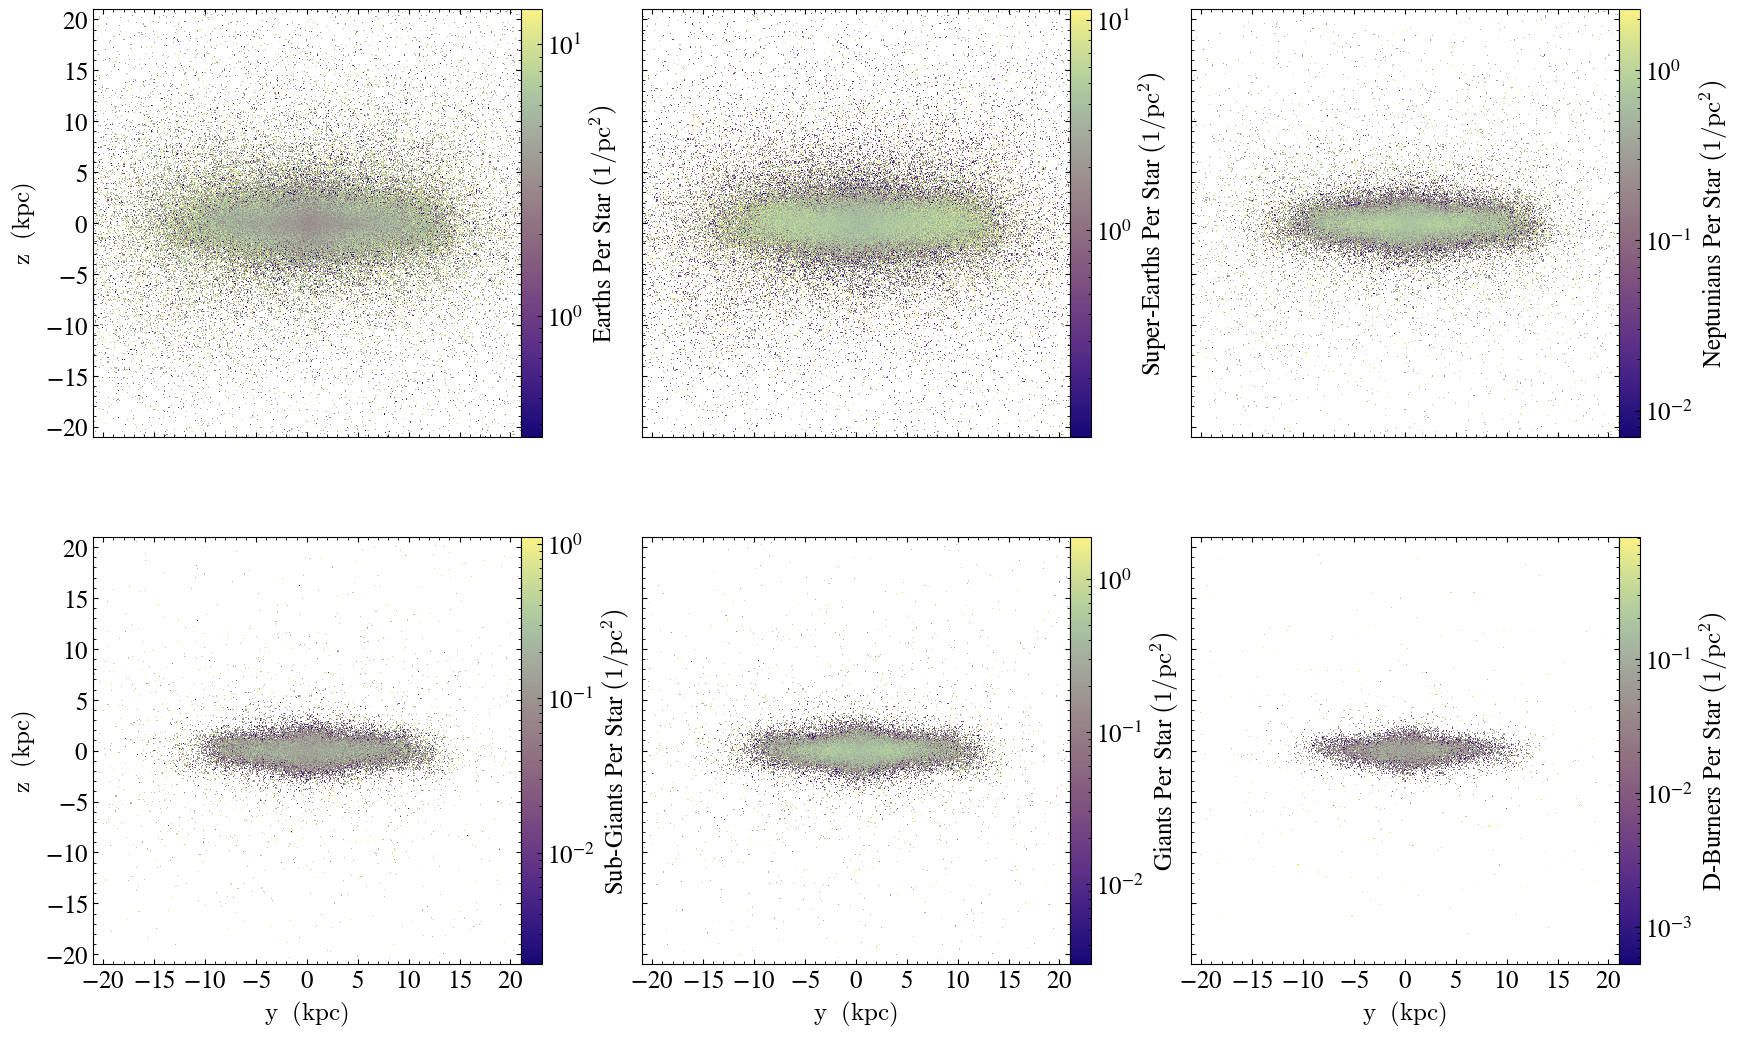

In [32]:
xplot, xfig = plot_maps(planet_categories, rotated_sphere_data, normal="x", save=save)
xplot_per_star, xfig_per_star = plot_maps(planet_categories, rotated_sphere_data, normal="x", weight_field=("stars", "number"), global_normalisation=False, save=save)

## 1D Profiles

In [ ]:
figs, axes = plot_1dprofiles(
    disk_data.sphere([0, 0, 0], 30), halo=mw, disk_height=ds.quan(0.5, "kpc"), save=save
)

## 2D Profiles

In [ ]:
age_plots = plot_2dprofiles(sphere_data, "stellar_age", save=save)

In [ ]:
fe_plots = plot_2dprofiles(sphere_data, "metallicity", save=save)